In [85]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from scipy.signal import find_peaks, convolve
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, parent_dir)
import matplotlibcolors
plt.style.use(parent_dir + '/matplotlibrc')

%matplotlib widget

In [104]:
files = glob('./setup/*.npy')
dark_freqs, dark_s21 = np.load(files[0])
dark_s21 -= dark_s21[0]

36


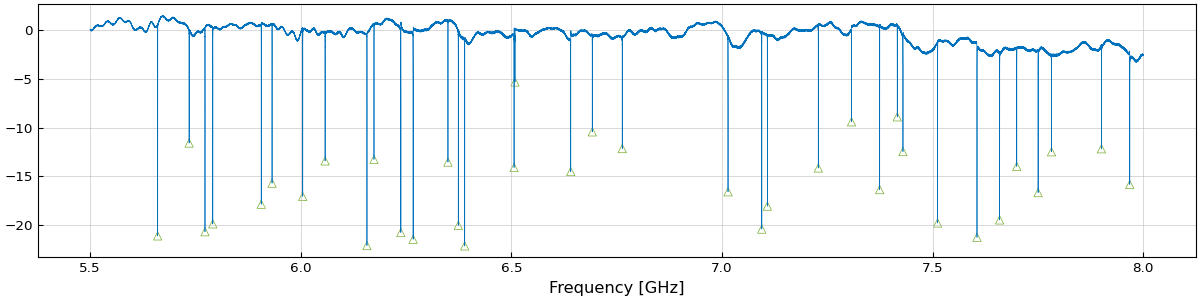

In [105]:
mph = 39
mpp = 3
locs, props = find_peaks(-dark_s21, height=-mph, prominence=mpp)
heights = props['peak_heights']

dark_f0s = dark_freqs[locs]
dark_s21_mins = dark_s21[locs]
fig, ax = plt.subplot_mosaic('b', sharex=True, figsize=(12, 3), constrained_layout=True)
ax['b'].plot(dark_freqs, dark_s21, lw=.5)

ax['b'].scatter(dark_f0s, dark_s21_mins, marker='^', c='None', edgecolor='g')
ax['b'].set_xlabel('Frequency [GHz]')
print(len(locs))

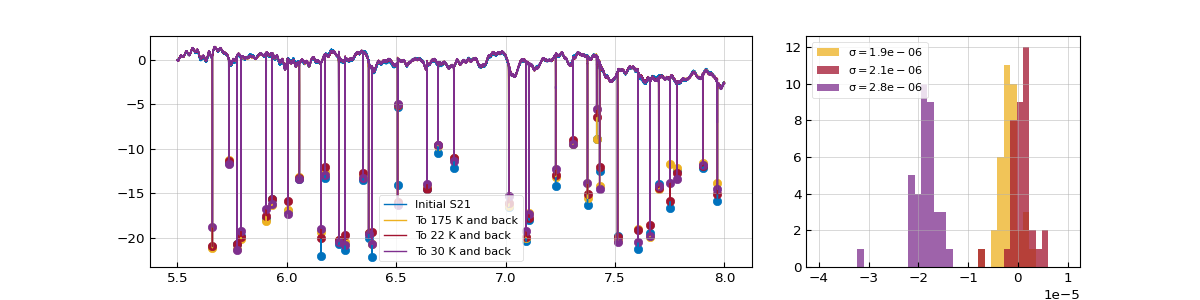

In [106]:
labels = ['To 175 K and back', 'To 22 K and back', 'To 30 K and back']
colors = ['y', 'r', 'p']
fig, ax = plt.subplot_mosaic('aab', figsize=(12,3))
ax['a'].plot(dark_freqs, dark_s21, label='Initial S21', c='b')
ax['a'].scatter(dark_f0s, dark_s21_mins, c='b')
for i, file in enumerate(files[1:]):
    freqs, s21 = np.load(file)
    s21 -= s21[0] - dark_s21[0]
    locs, props = find_peaks(-s21, height=-mph, prominence=mpp)
    f0s = freqs[locs]
    s21_mins = s21[locs]
    scatter = (f0s - dark_f0s) / dark_f0s
    ax['a'].plot(freqs, s21, label=labels[i], c=colors[i])
    ax['a'].scatter(f0s, s21_mins, c=colors[i])
    bins = np.linspace(-4e-5, 1e-5, 40)
    ax['b'].hist(scatter, bins=bins, alpha=0.75, facecolor=colors[i], label='$\sigma=%.1e$' % scatter.std())
ax['a'].legend()
ax['b'].legend()